In [2]:
%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt



In [3]:
# Create a path 
athlete_bio = Path("Olympic_Athlete_Bio.csv")
event_results = Path("Olympic_Athlete_Event_Results.csv")
medal_tally = Path("Olympic_Games_Medal_Tally.csv")
results = Path("Olympic_Results.csv")
country = Path("Olympics_Country.csv")
games = Path("Olympics_Games.csv")



In [4]:
# Store filepath in a variable and the data into a Pandas DataFrame
bio_data = pd.read_csv(athlete_bio)
events_results_data = pd.read_csv(event_results)
medal_data = pd.read_csv(medal_tally)
results_data = pd.read_csv(results)
country_data = pd.read_csv(country)
games_data = pd.read_csv(games)


In [5]:
columns_to_drop = ['sport_url', 'result_date','result_location','result_format','result_detail','result_description']
result_data_drop = results_data.drop(columns_to_drop, axis=1)
result_data_drop

,result_id,event_title,edition,edition_id,sport,result_participants
0,30359,"Super-Heavyweight (>105 kilograms), Men",2004 Summer Olympics,26,Weightlifting,17 from 15 countries
1,1626,"Giant Slalom, Women1",1998 Winter Olympics,46,Snowboarding,31 from 14 countries
2,76,"Singles, Men",1976 Winter Olympics,40,Luge,43 from 15 countries
3,962,"1,500 metres, Men",1928 Winter Olympics,30,Speed Skating,30 from 14 countries
4,258824,"Canadian Singles, Slalom, Men",2008 Summer Olympics,53,Canoe Slalom,16 from 16 countries
...,...,...,...,...,...,...
7389,19001250,"Basketball, Men",2020 Summer Olympics,61,Basketball,143 from 12 countries
7390,84835,"Sabre, Team, Men",1936 Summer Olympics,11,Fencing,107 from 21 countries
7391,72031,"Foil, Individual, Men",1900 Summer Olympics,2,Fencing,53 from 9 countries
7392,258676,"Beach Volleyball, Women",2008 Summer Olympics,53,Beach Volleyball,48 from 17 countries


In [6]:
events_results_data.head(-10)


,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
316819,2022 Winter Olympics,62,CHN,Bobsleigh,"Monobob, Women",19019671,Huai Mingming,148023,6,NaN,False
316820,2022 Winter Olympics,62,SUI,Bobsleigh,"Monobob, Women",19019671,Melanie Hasler,148906,7,NaN,False
316821,2022 Winter Olympics,62,CAN,Bobsleigh,"Monobob, Women",19019671,Cynthia Appiah,147913,8,NaN,False
316822,2022 Winter Olympics,62,CHN,Bobsleigh,"Monobob, Women",19019671,Ying Qing,148025,9,NaN,False


In [7]:
ev_r_to_drop = ['pos','isTeamSport','edition','edition_id','country_noc','athlete','medal','sport','event']
events_results_data_drop = events_results_data.drop(ev_r_to_drop, axis=1)
events_results_data_drop

,result_id,athlete_id
0,56265,64710
1,56313,64756
2,56338,64808
3,56338,922519
4,56338,64735
...,...,...
316829,19019671,148662
316830,19019671,138683
316831,19019671,137542
316832,19019671,128682


In [8]:
final_result_df = pd.merge(events_results_data_drop, result_data_drop, on='result_id', how='inner')
final_result_df

,result_id,athlete_id,event_title,edition,edition_id,sport,result_participants
0,56265,64710,"100 metres, Men",1908 Summer Olympics,5,Athletics,60 from 16 countries
1,56313,64756,"400 metres, Men",1908 Summer Olympics,5,Athletics,38 from 11 countries
2,56338,64808,"800 metres, Men",1908 Summer Olympics,5,Athletics,38 from 11 countries
3,56338,922519,"800 metres, Men",1908 Summer Olympics,5,Athletics,38 from 11 countries
4,56338,64735,"800 metres, Men",1908 Summer Olympics,5,Athletics,38 from 11 countries
...,...,...,...,...,...,...,...
316725,19019671,148662,"Monobob, Women",2022 Winter Olympics,62,Bobsleigh,20 from 16 countries
316726,19019671,138683,"Monobob, Women",2022 Winter Olympics,62,Bobsleigh,20 from 16 countries
316727,19019671,137542,"Monobob, Women",2022 Winter Olympics,62,Bobsleigh,20 from 16 countries
316728,19019671,128682,"Monobob, Women",2022 Winter Olympics,62,Bobsleigh,20 from 16 countries


In [9]:
winner_olympic = pd.merge(bio_data,final_result_df, on='athlete_id', how='inner')
winner_olympic.head(5)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,result_id,event_title,edition,edition_id,sport,result_participants
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62051,"4 x 400 metres Relay, Women",1976 Summer Olympics,19,Athletics,44 from 11 countries
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62530,"4 x 400 metres Relay, Women",1980 Summer Olympics,20,Athletics,47 from 11 countries
2,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,258676,"Beach Volleyball, Women",2008 Summer Olympics,53,Beach Volleyball,48 from 17 countries
3,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,257228,"10,000 metres, Men",2008 Summer Olympics,53,Athletics,38 from 20 countries
4,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN,70092,"Individual All-Around, Men",1932 Summer Olympics,10,Artistic Gymnastics,24 from 5 countries


In [10]:
winner_olympic.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,result_id,event_title,edition,edition_id,sport,result_participants
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62051,"4 x 400 metres Relay, Women",1976 Summer Olympics,19,Athletics,44 from 11 countries
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62530,"4 x 400 metres Relay, Women",1980 Summer Olympics,20,Athletics,47 from 11 countries


In [11]:
# Load your dataset into a Pandas DataFrame
winner_olympic

# Create new columns for 'year' and 'season'
winner_olympic['year'] = ''
winner_olympic['season'] = ''

# Iterate through each row and split the 'edition' column
for index, row in winner_olympic.iterrows():
    edition_parts = row['edition'].split()
    winner_olympic.at[index, 'year'] = edition_parts[0]
    winner_olympic.at[index, 'season'] = edition_parts[1]

# Display the updated DataFrame
winner_olympic.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,result_id,event_title,edition,edition_id,sport,result_participants,year,season
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62051,"4 x 400 metres Relay, Women",1976 Summer Olympics,19,Athletics,44 from 11 countries,1976,Summer
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62530,"4 x 400 metres Relay, Women",1980 Summer Olympics,20,Athletics,47 from 11 countries,1980,Summer


In [12]:
# Filter data for Summer Olympics
summer_data = winner_olympic[winner_olympic['season'] == 'Summer']
summer_data


,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,result_id,event_title,edition,edition_id,sport,result_participants,year,season
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62051,"4 x 400 metres Relay, Women",1976 Summer Olympics,19,Athletics,44 from 11 countries,1976,Summer
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62530,"4 x 400 metres Relay, Women",1980 Summer Olympics,20,Athletics,47 from 11 countries,1980,Summer
2,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,258676,"Beach Volleyball, Women",2008 Summer Olympics,53,Beach Volleyball,48 from 17 countries,2008,Summer
3,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,257228,"10,000 metres, Men",2008 Summer Olympics,53,Athletics,38 from 20 countries,2008,Summer
4,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN,70092,"Individual All-Around, Men",1932 Summer Olympics,10,Artistic Gymnastics,24 from 5 countries,1932,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316718,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,64103,"4 x 400 metres Relay, Men",1992 Summer Olympics,23,Athletics,102 from 24 countries,1992,Summer
316719,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,64676,"400 metres, Men",1996 Summer Olympics,24,Athletics,62 from 42 countries,1996,Summer
316720,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,64790,"4 x 400 metres Relay, Men",1996 Summer Olympics,24,Athletics,151 from 35 countries,1996,Summer
316721,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,65353,"400 metres, Men",2000 Summer Olympics,25,Athletics,68 from 44 countries,2000,Summer


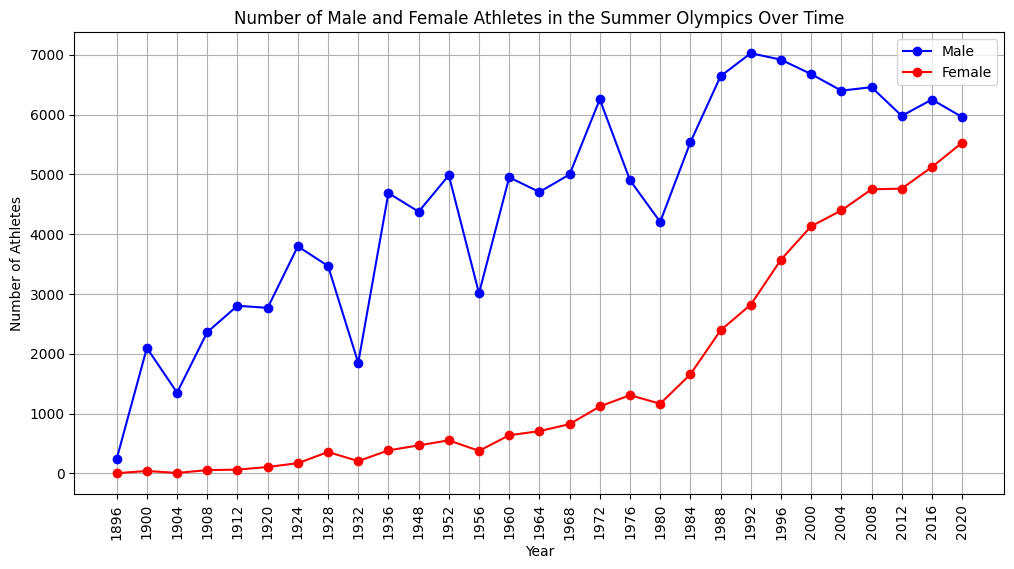

In [13]:
# Group data by year and gender to count unique athletes
gender_per_year = summer_data.groupby(['year', 'sex'])['name'].nunique().unstack()

# Create a line chart for the number of male and female athletes over time
plt.figure(figsize=(12, 6))
plt.plot(gender_per_year.index, gender_per_year['Male'], marker='o', color='b', label='Male')
plt.plot(gender_per_year.index, gender_per_year['Female'], marker='o', color='r', label='Female')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Male and Female Athletes in the Summer Olympics Over Time')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [14]:
women_participated_games = summer_data[summer_data['sex'] == 'Female']['sport'].unique()
print(women_participated_games)

['Athletics' 'Beach Volleyball' 'Cycling Mountain Bike' 'Swimming'
 'Shooting' 'Tennis' 'Taekwondo' 'Rowing' 'Art Competitions'
 'Modern Pentathlon' 'Hockey' 'Archery' 'Artistic Gymnastics'
 'Artistic Swimming' 'Triathlon' 'Volleyball' 'Sailing' 'Trampolining'
 'Marathon Swimming' 'Handball' 'Judo' 'Karate' 'Rugby Sevens' 'Golf'
 'Basketball' 'Weightlifting' 'Canoe Sprint' 'Cycling Road' 'Football'
 'Rhythmic Gymnastics' 'Softball' 'Fencing' 'Badminton'
 'Equestrian Eventing' 'Water Polo' '3x3 Basketball' 'Table Tennis'
 'Cycling Track' 'Skateboarding' 'Waterskiing' 'Equestrian Dressage'
 'Diving' 'Equestrian Jumping' 'Basque pelota' 'Wrestling' 'Boxing'
 'Croquet' 'Bowling' 'Canoe Slalom' 'Alpinism' 'Cycling BMX Racing'
 'Cycling BMX Freestyle' 'Korfball' 'Wushu' 'Figure Skating' 'Surfing'
 'Ballooning' 'Kendo' 'Sport Climbing' 'Motorboating' 'Gliding']


In [15]:
# Filter the dataset to include only female athletes
female_athletes = summer_data[summer_data['sex'] == 'Female']

# Extract unique combinations of Games and Year
women_participated_years = female_athletes[['sport', 'year']].drop_duplicates()

print(women_participated_years)

                        sport  year
0                   Athletics  1976
1                   Athletics  1980
2            Beach Volleyball  2008
12           Beach Volleyball  2020
29      Cycling Mountain Bike  2020
...                       ...   ...
252534                Sailing  1908
265934                 Rowing  1900
274397                Sailing  1976
283763                Gliding  1936
313833       Art Competitions  1920

[505 rows x 2 columns]


In [16]:
# Count the number of occurrences for each year
year_counts = women_participated_years['year'].value_counts().sort_index()
year_counts

year
1896     1
1900     8
1904     1
1908     6
1912     4
1920     8
1924     6
1928     8
1932     5
1936     9
1948     7
1952     9
1956     6
1960     9
1964    12
1968    12
1972    15
1976    16
1980    16
1984    21
1988    27
1992    28
1996    30
2000    36
2004    37
2008    40
2012    39
2016    41
2020    48
Name: count, dtype: int64

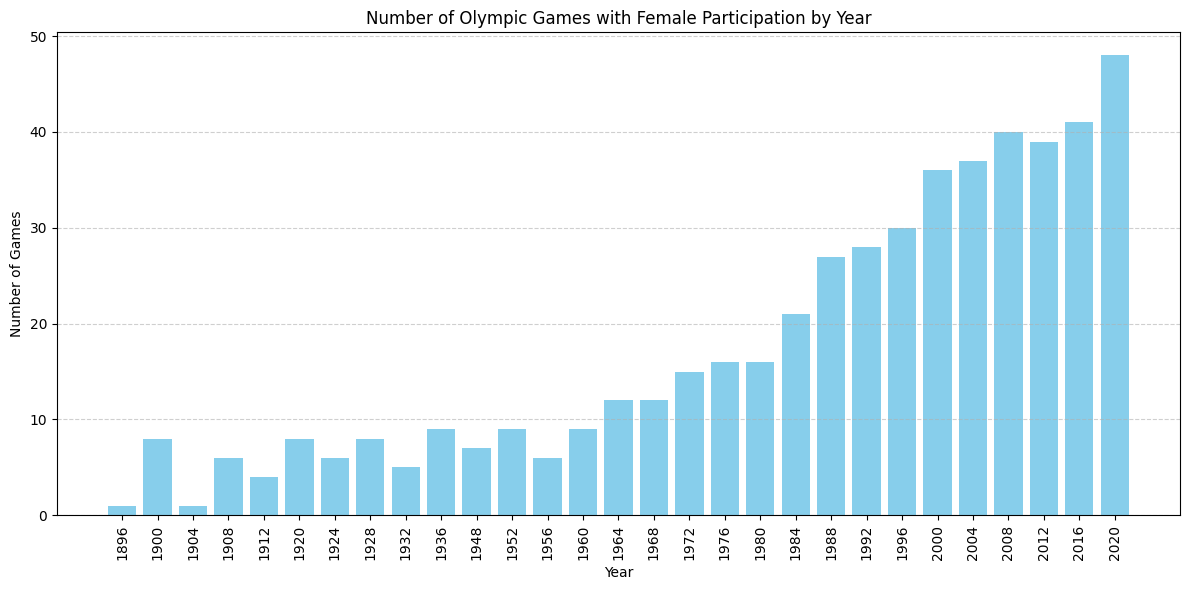

In [17]:


# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Olympic Games with Female Participation by Year')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot as an image
plt.savefig('female_participation_by_year.png')

plt.show()

In [42]:
# Filter data by gender
male_players = summer_data[summer_data['sex'] == 'Male']
female_players = summer_data[summer_data['sex'] == 'Female']

# Identify unique sports played by male players
male_sports = male_players['sport'].unique()

# Filter out female players
male_only_sports = male_players[~male_players['sport'].isin(female_players['sport'])]['sport'].unique()

print("Sports played only by men:")
print(male_only_sports)

Sports played only by men:
['Tug-Of-War' 'American Football' 'Baseball' 'Australian Rules Football'
 'Rugby' 'Equestrian Driving' 'Bicycle Polo' 'Motorcycle Sports'
 'Canoe Marathon' 'Lacrosse' 'Roque' 'Polo' 'Fishing' 'Ice Hockey'
 'Military Exercise' 'Boules' 'Automobile Racing' 'Roller Hockey'
 'Cricket' 'Equestrian Vaulting' 'Jeu De Paume' 'Pesäpallo' 'Longue Paume'
 'Firefighting' 'Racquets' 'Savate' 'Kaatsen' 'Glíma' 'Lifesaving'
 'Canne De Combat' 'Aeronautics']


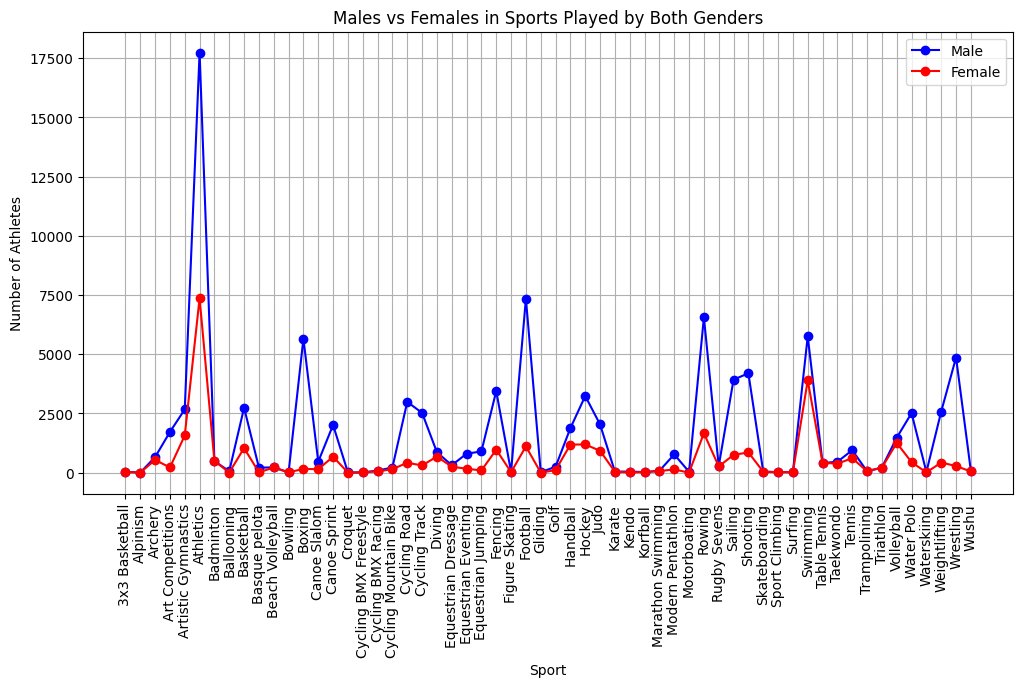

In [44]:
# Group data by year and gender to count unique athletes
gender_per_sport = summer_data.groupby(['sport', 'sex'])['name'].nunique().unstack()

# Filter out sports not played by both men and women
gender_per_sport_filtered = gender_per_sport[(gender_per_sport['Male'] > 0) & (gender_per_sport['Female'] > 0)]

# Create a line chart for the number of male and female athletes over time for filtered sports
plt.figure(figsize=(12, 6))
plt.plot(gender_per_sport_filtered.index, gender_per_sport_filtered['Male'], marker='o', color='b', label='Male')
plt.plot(gender_per_sport_filtered.index, gender_per_sport_filtered['Female'], marker='o', color='r', label='Female')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.title('Males vs Females in Sports Played by Both Genders')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

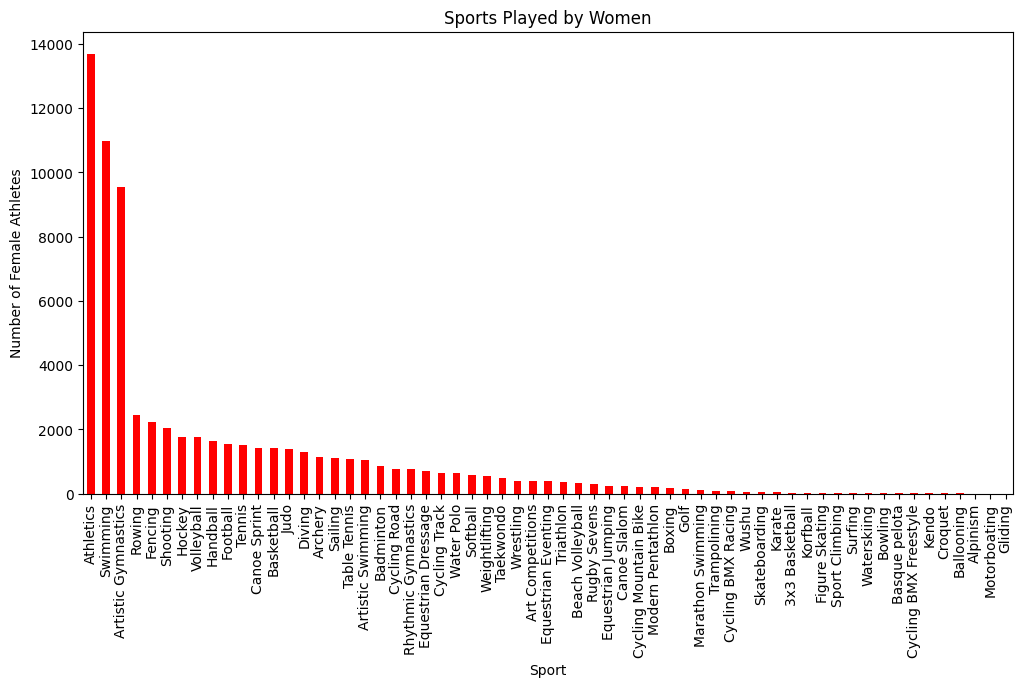

In [23]:
# Filter data for female athletes
female_data = summer_data[summer_data['sex'] == 'Female']

# Count the occurrences of each sport played by female athletes
sport_counts = female_data['sport'].value_counts()

# Create a bar chart to visualize the data
plt.figure(figsize=(12, 6))
sport_counts.plot(kind='bar', color='red')
plt.title('Sports Played by Women')
plt.xlabel('Sport')
plt.ylabel('Number of Female Athletes')
plt.xticks(rotation=90)
plt.show()

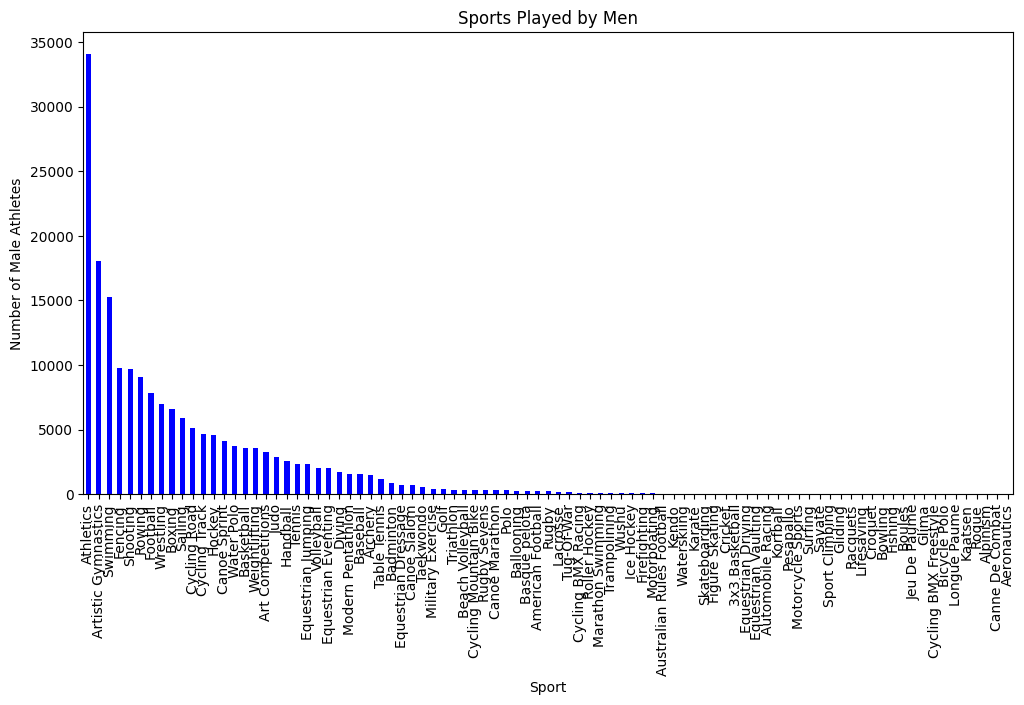

In [27]:
# Filter data for female athletes
male_data = summer_data[summer_data['sex'] == 'Male']

# Count the occurrences of each sport played by female athletes
sport_counts_male = male_data['sport'].value_counts()

# Create a bar chart to visualize the data
plt.figure(figsize=(12, 6))
sport_counts_male.plot(kind='bar', color='blue')
plt.title('Sports Played by Men')
plt.xlabel('Sport')
plt.ylabel('Number of Male Athletes')
plt.xticks(rotation=90)
plt.show()

In [31]:
sport_counts

sport
Athletics              13698
Swimming               10969
Artistic Gymnastics     9554
Rowing                  2457
Fencing                 2241
                       ...  
Croquet                    6
Ballooning                 6
Alpinism                   1
Motorboating               1
Gliding                    1
Name: count, Length: 61, dtype: int64